In [194]:
#This program generates the bar plot of FIG.2B 
#Mean firing rates of the different populations in the spontaneous condition. 
#Comparison between experimental data and 10 runs of the cortical column model.

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os
import sys
# # Change the working directory to the parent directory of the current working directory
# parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# print(parent_dir)
# os.chdir(parent_dir)
# sys.path.append(parent_dir)

In [196]:
#Importing some info I need for this program
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [197]:
#------------------------------------------------------------------------------
#Function to import the files of the spikes of each group of cells
#------------------------------------------------------------------------------
def take_files(a):
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [198]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups (I record from all)
#------------------------------------------------------------------------------
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    #print(runtime)
    
    #Total number of spikes and rate for each group
    
    #Layer 1
    tot_sp_vip1 =  S_vip1num_spikes  
    rate_vip1= tot_sp_vip1/(N1*runtime)

    #Layer 2/3
    tot_sp_e23 =  S_e23num_spikes
    #print(tot_sp_e23)
    #print(N[0][0])
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)

    #Layer 4
    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)
    
    #Layer 5
    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)
    
    #Layer 6
    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6,rate_vip1

In [ ]:
#------------------------------------------------------------------------------
#Matrices that will contain the firing rate of all the 10 SIMULATION, for each group of cell. 
#------------------------------------------------------------------------------
#Initialize the lists
rate_e23_all=[]
rate_e4_all=[]
rate_e5_all=[]
rate_e6_all=[]
rate_pv23_all=[]
rate_pv4_all=[]
rate_pv5_all=[]
rate_pv6_all=[]
rate_sst23_all=[]
rate_sst4_all=[]
rate_sst5_all=[]
rate_sst6_all=[]
rate_vip23_all=[]
rate_vip4_all=[]
rate_vip5_all=[]
rate_vip6_all=[]
rate_vip1_all=[]
#I import all the files in each folder named i-NUMBER 
for i in ['0','1','2','3','4','5','6','7','8','9']:
    #Import
    folder_name='../simulations_data/REVISIONS_1/reproduce_mean_FR/Sp_input_e4_150pA_e5_0pA_pv4_37pA_pv5_0pA_prop_pv4_25'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_name)
    
    #I compute the FR calling the function
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1,rate_vip1_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)

    #Append to the list
    rate_e23_all.append(rate_e23_1)
    rate_e4_all.append(rate_e4_1)
    rate_e5_all.append(rate_e5_1)
    rate_e6_all.append(rate_e6_1)
    rate_pv23_all.append(rate_pv23_1)
    rate_pv4_all.append(rate_pv4_1)
    rate_pv5_all.append(rate_pv5_1)
    rate_pv6_all.append(rate_pv6_1)
    rate_sst23_all.append(rate_sst23_1)
    rate_sst4_all.append(rate_sst4_1)
    rate_sst5_all.append(rate_sst5_1)
    rate_sst6_all.append(rate_sst6_1)
    rate_vip23_all.append(rate_vip23_1)
    rate_vip4_all.append(rate_vip4_1)
    rate_vip5_all.append(rate_vip5_1)
    rate_vip6_all.append(rate_vip6_1)
    rate_vip1_all.append(rate_vip1_1)

-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.850694
rate_e23: 0.461704 rate_pv23: 6.507692 rate_sst23: 6.007092 rate_vip23: 13.713396
rate_e4: 17.552805 rate_pv4: 11.942177 rate_sst4: 1.962264 rate_vip4: 2.123457
rate_e5: 2.139001 rate_pv5: 12.724868 rate_sst5: 6.095238 rate_vip5: 15.424242
rate_e6: 3.711533 rate_pv6: 10.120915 rate_sst6: 6.503268 rate_vip6: 4.245614
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.850694
rate_e23: 0.461704 rate_pv23: 6.507692 rate_sst23: 6.007092 rate_vip23: 13.713396
rate_e4: 17.552805 rate_pv4: 11.942177 rate_sst4: 1.962264 rate_vip4: 2.123457
rate_e5: 2.139001 rate_pv5: 12.724868 rate_sst5: 6.095238 rate_vip5: 15.424242
rate_e6: 3.711533 rate_pv6: 10.120915 rate_sst6: 6.503268 rate_vip6: 4.245614
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.850694
rate_e23: 0.461704 rate_pv23: 6.507692 rate_sst23: 6.00709

In [200]:
#Mean of all the 10 simulations for each group
m_e23=np.mean(rate_e23_all)
m_e4=np.mean(rate_e4_all)
m_e5=np.mean(rate_e5_all)
m_e6=np.mean(rate_e6_all)

m_pv23=np.mean(rate_pv23_all)
m_pv4=np.mean(rate_pv4_all)
m_pv5=np.mean(rate_pv5_all)
m_pv6=np.mean(rate_pv6_all)


m_sst23=np.mean(rate_sst23_all)
m_sst4=np.mean(rate_sst4_all)
m_sst5=np.mean(rate_sst5_all)
m_sst6=np.mean(rate_sst6_all)


m_vip23=np.mean(rate_vip23_all)
m_vip4=np.mean(rate_vip4_all)
m_vip5=np.mean(rate_vip5_all)
m_vip6=np.mean(rate_vip6_all)

m_vip1=np.mean(rate_vip1_all)

In [201]:
#Array containing the mean of 10 simulations, one value for each population
m_all=np.array([m_e23,m_pv23,m_sst23,m_vip23,
        m_e4,m_pv4,m_sst4,m_vip4,
         m_e5,m_pv5,m_sst5,m_vip5,
         m_e6,m_pv6,m_sst6,m_vip6])

FR_all_mean = m_all.reshape(4,4)
print(FR_all_mean)

# f=open("simulations_data/SPONT_runs/FR_all_spont_GH.txt",'w+') #create the file to store this info
# for i in range(0,len(FR_all_mean)):
#     for j in range(0,len(FR_all_mean)):
#         f.write('%f ' %FR_all_mean[i][j])
#     f.write('\n')
# f.close()

[[ 0.46170442  6.50769231  6.0070922  13.71339564]
 [17.55280528 11.94217687  1.96226415  2.12345679]
 [ 2.13900135 12.72486772  6.0952381  15.42424242]
 [ 3.71153339 10.12091503  6.50326797  4.24561404]]


In [202]:
#Standard deviations of 10 simulations for each group
s_e23=np.std(rate_e23_all)
s_e4=np.std(rate_e4_all)
s_e5=np.std(rate_e5_all)
s_e6=np.std(rate_e6_all)

s_pv23=np.std(rate_pv23_all)
s_pv4=np.std(rate_pv4_all)
s_pv5=np.std(rate_pv5_all)
s_pv6=np.std(rate_pv6_all)


s_sst23=np.std(rate_sst23_all)
s_sst4=np.std(rate_sst4_all)
s_sst5=np.std(rate_sst5_all)
s_sst6=np.std(rate_sst6_all)


s_vip23=np.std(rate_vip23_all)
s_vip4=np.std(rate_vip4_all)
s_vip5=np.std(rate_vip5_all)
s_vip6=np.std(rate_vip6_all)

s_vip1=np.std(rate_vip1_all)

In [203]:
#Standard deviation for each group, it will be my error in the plot
# s_all=np.array([s_e23,s_pv23,s_sst23,s_vip23,
#         s_e4,s_pv4,s_sst4,s_vip4,
#          s_e5,s_pv5,s_sst5,s_vip5,
#          s_e6,s_pv6,s_sst6,s_vip6])

# std_all = s_all.reshape(4,4)
# print(std_all)
#IF you want to save it 
# f=open("simulations_data/SPONT_runs/std_all_spont_GH.txt",'w+') #create the file containing the std
# for i in range(0,len(std_all)):
#     for j in range(0,len(std_all)):
#         f.write('%f ' %std_all[i][j])
#     f.write('\n')
# f.close()

In [204]:
#Errors that will be on the bar plot, std of each group
errors = [s_vip6,s_sst6,s_pv6,s_e6,s_vip5,s_sst5,s_pv5,s_e5,s_vip4,
                     s_sst4,s_pv4,s_e4,s_vip23,s_sst23,s_pv23,s_e23]

In [205]:
#Create the plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.patches import Patch

def plot_meanFR(N, errors, rate_e23, rate_pv23, rate_sst23, rate_vip23,
                rate_e4, rate_pv4, rate_sst4, rate_vip4,
                rate_e5, rate_pv5, rate_sst5, rate_vip5,
                rate_e6, rate_pv6, rate_sst6, rate_vip6):

    labels = ['V6', 'S6', 'P6', 'E6',
              'V5', 'S5', 'P5', 'E5',
              'V4', 'S4', 'P4', 'E4',
              'V23', 'S23', 'P23', 'E23']

    # Means for experiment in which feedforward input is fed to 5% of PV neurons in layer 4
    exp_means = [4.298246, 6.411765, 10.241830, 3.698601,
                 16.030303, 6.077381, 12.730159, 2.180387,
                 2.382716, 2.018868, 11.074830, 17.583168,
                 13.956386, 6.269504, 6.692308, 0.491640]
    
    # Model means
    model_means_I = [rate_vip6, rate_sst6, rate_pv6, rate_e6,
                     rate_vip5, rate_sst5, rate_pv5, rate_e5,
                     rate_vip4, rate_sst4, rate_pv4, rate_e4,
                     rate_vip23, rate_sst23, rate_pv23, rate_e23]

    # Increase figure width slightly
    f, ax = plt.subplots(figsize=(15, 18))
    
    y = np.arange(len(labels))
    width = 0.4
    c = ['orange', 'green', 'royalblue', 'crimson']  # VIP, SST, PV, E

    # Bars: Model
    rects_model = ax.barh(y + width/2, model_means_I, width,
                          align='center', edgecolor=c, color=c, alpha=0.5)
    # Bars: Experiments
    rects_exp = ax.barh(y - width/2, exp_means, width, color=c,
                        edgecolor='black', hatch='//', alpha=0.8)
    
    plt.rcParams['hatch.linewidth'] = 2
    plt.rcParams.update({'hatch.color': 'k'})

    # Clean up spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.setp(ax.spines.values(), linewidth=3)

    ax.set_xlabel('Firing rates (spikes/s)', fontsize=35)
    ax.xaxis.set_tick_params(width=3)
    plt.xticks(size=32)
    plt.yticks(color='w')
    plt.locator_params(axis='x', nbins=5)
    plt.locator_params(axis='y', nbins=1)

    # Get x-limit to place background rectangles
    x_max = ax.get_xlim()[1]

    # Background rectangles for layers
    rect6 = mpatches.Rectangle((0, -0.8), x_max, 4.3, alpha=0.1,
                               facecolor="grey", linewidth=1, zorder=0)
    rect5 = mpatches.Rectangle((0, 3.5), x_max, 4, fill=False, alpha=0.1,
                               color="black", linewidth=1, zorder=0)
    rect4 = mpatches.Rectangle((0, 7.5), x_max, 4, alpha=0.1,
                               facecolor="pink", linewidth=1, zorder=0)
    rect23 = mpatches.Rectangle((0, 11.5), x_max, 4, fill=False, alpha=0.1,
                                color="green", linewidth=1, zorder=0)
    for rect in [rect6, rect5, rect4, rect23]:
        ax.add_patch(rect)

    # Text labels for layers
    ax.text(x_max + 0.2, 2, 'Layer 6', fontsize=32,
            bbox=dict(facecolor='grey', alpha=0.1))
    ax.text(x_max + 0.2, 5, 'Layer 5', fontsize=32,
            bbox=dict(facecolor='white', alpha=0.1))
    ax.text(x_max + 0.2, 10, 'Layer 4', fontsize=32,
            bbox=dict(facecolor='pink', alpha=0.1))
    ax.text(x_max + 0.2, 13, 'Layer 2/3', fontsize=32,
            bbox=dict(edgecolor="green", facecolor='white', alpha=0.1))

    # Remove y-axis ticks
    ax.tick_params(top=False, bottom=True, left=False, right=False,
                   labelleft=False, labelbottom=True)

    # Legend 1 (Model vs. Experiments)
    legend_elements = [
         Patch(facecolor='white', edgecolor='k', linewidth=3, label='Feedforward to 25% L4PV'),
         Patch(facecolor='white', edgecolor='k', hatch='//', linewidth=3, label='Feedforward to 5% L4PV')
    ]
    l1 = ax.legend(handles=legend_elements,
                   loc='upper left',
                   bbox_to_anchor=(0.6, 1.0),  # moved left
                   fontsize=30, frameon=True)
    ax.add_artist(l1)

    # Legend 2 (Cell types)
    legend_elements1 = [
         Patch(facecolor='crimson', alpha=0.8, edgecolor='k', label='E'),
         Patch(facecolor='royalblue', alpha=0.8, edgecolor='k', label='PV'),
         Patch(facecolor='green', alpha=0.8, edgecolor='k', label='SST'),
         Patch(facecolor='orange', alpha=0.8, edgecolor='k', label='VIP')
    ]
    l2 = ax.legend(handles=legend_elements1,
                   loc='lower left',
                   bbox_to_anchor=(0.98, 0.0),  # moved left
                   fontsize=25, frameon=True)
    ax.add_artist(l2)

    # Use simple tight_layout without extra rect parameters
    f.tight_layout()

    plt.savefig('../IMAGES/FF_to_25pv_vs_5pv.png',
                pad_inches=0.3,
                bbox_inches='tight',
                bbox_extra_artists=[l1, l2])
    plt.show()


In [207]:
#I call the plot with the values I need: in this case the mean FR that I computed before

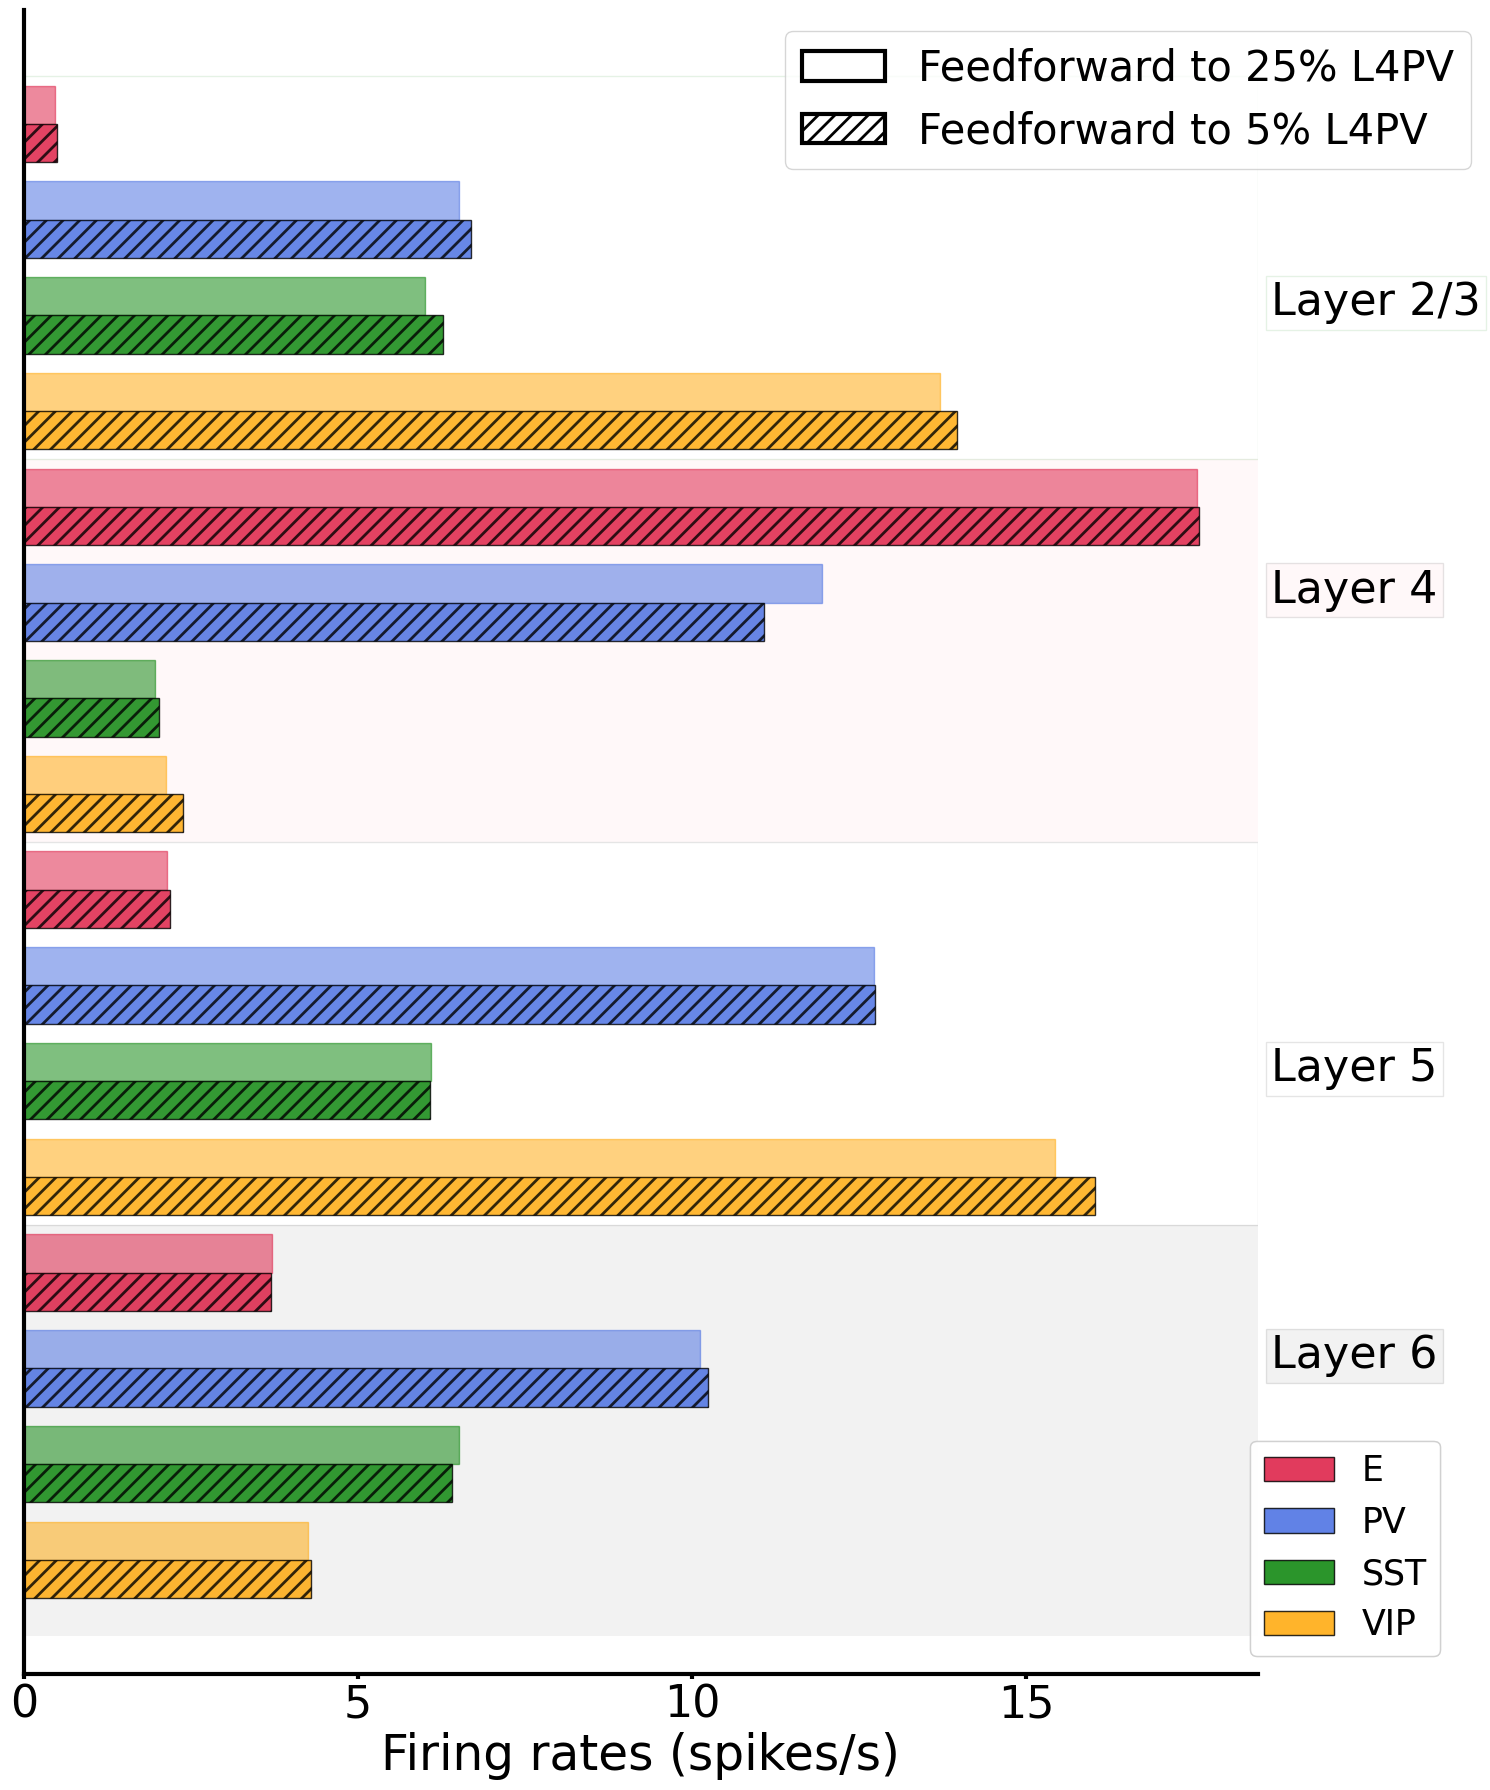

In [208]:
plot_meanFR(N,errors,m_e23,m_pv23,m_sst23,m_vip23,m_e4,m_pv4,m_sst4,m_vip4,m_e5,m_pv5,m_sst5,m_vip5,m_e6,m_pv6,m_sst6,m_vip6)